In [2]:
import networkx as nx
import numpy as np
from src.em import em_algorithm
from graspologic.plot import adjplot
import pandas as pd
import matplotlib.pyplot as plt
import pickle

/home/theilo/Software/Miniconda/envs/PGM/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/theilo/Software/Miniconda/envs/PGM/lib/python3.11/site-packages/graspologic/models/edge_swaps.py:215: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap, nopython=False)


In [5]:
edges_data = "data/E-coli/Escherichia-coli_edge-list.txt"
labels_data = "data/E-coli/Escherichia-coli.txt"

# Nodes
with open(edges_data) as edgelist:
    nb_nodes = int(edgelist.readline().strip("Nb_nodes:"))
G = nx.Graph()
G.add_nodes_from(range(nb_nodes))

# Edges
with open(edges_data) as edgelist:
    partial_graph = nx.read_edgelist(edgelist)
for edge in partial_graph.edges():
    G.add_edge(int(edge[0]), int(edge[1]))

# Labels
with open(labels_data) as labels:
    labels = labels.readlines()[1:]
    labels = [label.strip() for label in labels]
    labels = np.array(labels)
assert len(labels) == len(G.nodes())
for i, label in enumerate(labels):
    G.nodes[i]["label"] = label

X = nx.adjacency_matrix(G).todense()

In [ ]:
Q = 21
alpha, pi, tau = em_algorithm(
    X, Q, n_init=1, iterations=10, implementation="pytorch_log"
)

In [4]:
with open("results/alpha.pkl", "wb") as f:
    pickle.dump(alpha, f)
with open("results/pi.pkl", "wb") as f:
    pickle.dump(pi, f)
with open("results/tau.pkl", "wb") as f:
    pickle.dump(tau, f)

In [3]:
with open("results/alpha.pkl", "rb") as f:
    alpha = pickle.load(f)
with open("results/pi.pkl", "rb") as f:
    pi = pickle.load(f)
with open("results/tau.pkl", "rb") as f:
    tau = pickle.load(f)

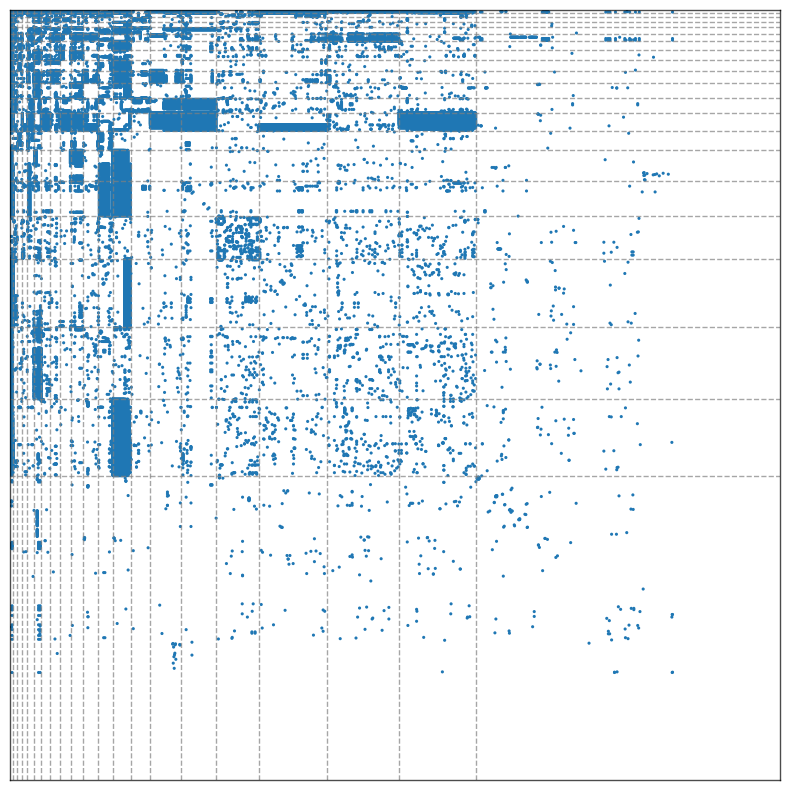

In [6]:
classification = tau.argmax(axis=1)

meta = pd.DataFrame(
    data={
        "Class": classification,
    },
)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(data=X, ax=ax, meta=meta, plot_type="scattermap", group=["Class"], ticks=False)
plt.savefig("images/escheria-coli.png")
plt.show()

# SBM dataset

In [3]:
from src.data import generate_SBM_dataset, graph_and_params_from_archive
from src.graphs import *
from src.experiments import launch_experiment, write_report, initialization_sensitivity

In [2]:
%reload_ext autoreload
%autoreload 2

In [123]:
generate_SBM_dataset(2, n_graphs=10)

Generating dataset...
0% complete...
10% complete...
20% complete...
30% complete...
40% complete...
50% complete...
60% complete...
70% complete...
80% complete...
90% complete...
Done.


[0.33333333 0.33333333 0.33333333]
[[0.9  0.02 0.02]
 [0.02 0.9  0.02]
 [0.02 0.02 0.9 ]]


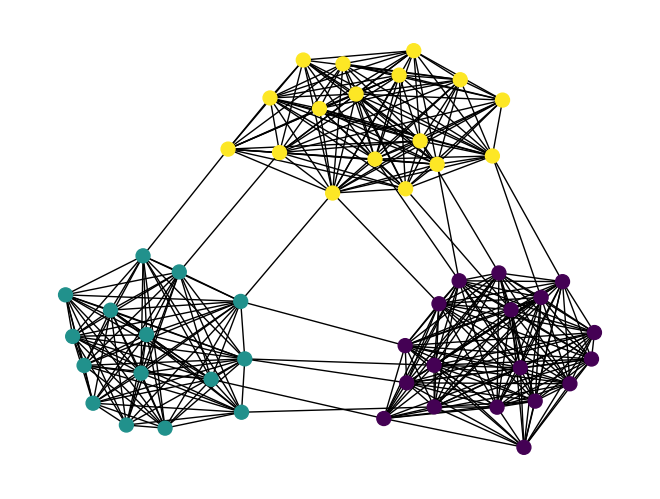

In [130]:
X, Z, alpha, pi = graph_and_params_from_archive("SBM/experiment_2/graph_5.npz")
draw_graph(X, Z, tight=True)

In [68]:
launch_experiment(1, n_init=5, n_iter=10)

0% complete...
10% complete...
!! Skipped one graph due to decreasing log likelihood !!
20% complete...
!! Skipped one graph due to decreasing log likelihood !!
30% complete...
!! Skipped one graph due to decreasing log likelihood !!
40% complete...
!! Skipped one graph due to decreasing log likelihood !!
50% complete...
60% complete...
!! Skipped one graph due to decreasing log likelihood !!
70% complete...
!! Skipped one graph due to decreasing log likelihood !!
80% complete...
!! Skipped one graph due to decreasing log likelihood !!
90% complete...
!! Skipped one graph due to decreasing log likelihood !!


In [66]:
write_report(1)

In [3]:
initialization_sensitivity(1, n_iter=10, implementation="pytorch")

Initialization 1/1...


In [142]:
partial_graph.nodes()

NodeView(('35', '1033', '103482', '103515', '1050679', '1103960', '1103985', '1109199', '1112911', '1113438', '1113831', '1114331', '1117476', '1119505', '1119708', '1120431', '1123756', '1125386', '1127430', '1127913', '1128204', '1128227', '1128314', '1128453', '1128945', '1128959', '1128985', '1129018', '1129027', '1129573', '1129683', '1129778', '1130847', '1130856', '1131116', '1131360', '1131557', '1131752', '1133196', '1133338', '1136814', '1137466', '1152421', '1152508', '1153065', '1153280', '1153577', '1153853', '1153943', '1154176', '1154459', '116552', '12576', '128540', '132806', '135130', '141342', '141347', '148170', '15670', '1688', '175291', '178727', '18582', '190697', '190706', '1956', '197054', '198443', '198653', '206371', '210871', '229635', '231249', '248425', '249421', '254923', '259701', '259702', '263279', '263498', '265203', '273152', '27510', '28290', '286500', '287787', '28851', '289779', '289780', '289781', '307015', '335733', '33904', '33907', '35061', '3

In [143]:
edges_data = "data/cora/cora.cites"

with open(edges_data) as edgelist:
    partial_graph = nx.read_edgelist(edgelist)
G = nx.Graph()
G.add_nodes_from(range(len(partial_graph.nodes())))
for edge in partial_graph.edges():
    G.add_edge(int(edge[0]), int(edge[1]))